Jeff Smolinski<br>
7/7/2021<br>
4449 Midterm<br>

week 10 perceptron - image classifier<br>
C:\Users\smoli\Dropbox\_ME\school\University of Denver\Course 4432 ML\cs4432_demos

# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [2]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

mkdir: cannot create directory ‘dataroot’: File exists
--2021-07-07 01:10:19--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.2’

data_1.zip.2        100%[===================>]  30.59M  9.67MB/s    in 3.2s    

2021-07-07 01:10:23 (9.67 MB/s) - ‘dataroot/data_1.zip.2’ saved [32074743/32074743]

--2021-07-07 01:10:24--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to 

In [3]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [1]:
# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [2]:
# Load images
import pickle
signimages = pickle.load( open( "dataroot/train.p", "rb" ) )

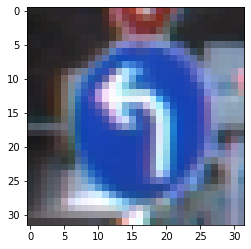

The image shows a Turn left ahead sign


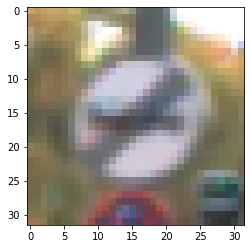

The image shows a End of no passing sign


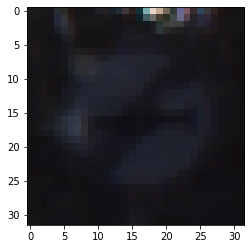

The image shows a End of no passing sign


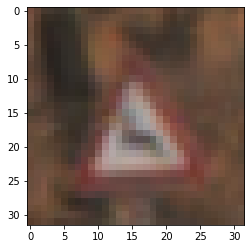

The image shows a Wild animals crossing sign


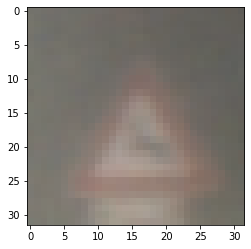

The image shows a Wild animals crossing sign


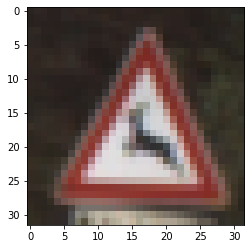

The image shows a Wild animals crossing sign


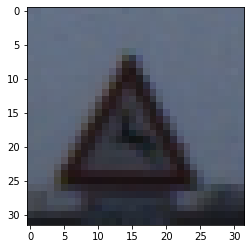

The image shows a Wild animals crossing sign


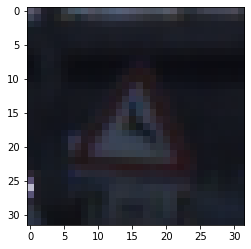

The image shows a Wild animals crossing sign


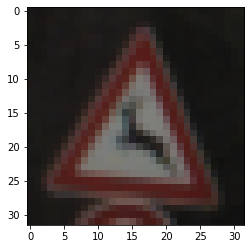

The image shows a Wild animals crossing sign


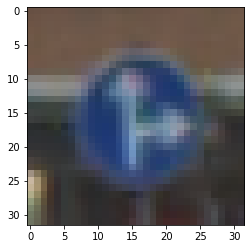

The image shows a Go straight or right sign


In [3]:
# Preview image
import matplotlib.pyplot as plt
import numpy as np
import cv2

inx = [20123, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i in inx:
    plt.imshow(signimages['features'][i])
    plt.show()
    print("The image shows a {} sign".format(signnames[signimages['labels'][i]]))

In [4]:
'''%%bash

pip install opencv-python'''

'%%bash\n\npip install opencv-python'

The first step may be correcting this data set by correcting labels or dropping or replacing bad images with good ones.<br><br>
It appears that the centering of these images is including a large margin of unnecessary pixel info. reducing the border images could help.<br><br>
Add a column of new data that is the mode of 2 or three colors from the center of the image will help greatly.


In [5]:
#signimages_df = pd.DataFrame.from_dict(signimages, orient='index')

In [6]:
unique, counts = np.unique(signimages['labels'], return_counts=True)
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

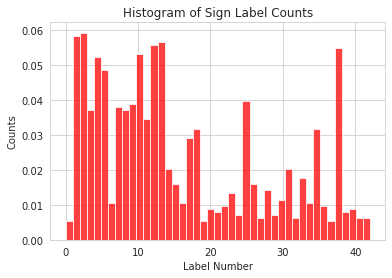

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

n, bins, patches = plt.hist(signimages['labels'], bins=43, density=True, facecolor='r', alpha=0.75)


plt.xlabel('Label Number')
plt.ylabel('Counts')
plt.title('Histogram of Sign Label Counts')
plt.show()


It appears that the labels are not all that uniform.<br>
We could use a reduced sample from the larger count labels until all counts are around 0.01.<br>
We could drop all signs below 0.01 or 0.02.<br>
We could leave it as is as well to use the raw set as the control benchmark.<br><br>
Fixing and removing labels is high priority.

In [8]:
unique, counts = np.unique(signnames, return_counts=True)
unique

array([{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go str

In [9]:
type(unique)

numpy.ndarray

In [10]:
for key, value in signnames.items():
    print(key, value)

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


In [86]:
# write all images to JPG folder
'''
for i in range(len(signimages['features'])):
    #print(i)
    plt.imsave('data/imgs/'+str(i)+'.jpg', signimages['features'][i])'''

In [11]:
signimages['features'][2]

array([[[29, 25, 25],
        [29, 26, 26],
        [30, 27, 27],
        ...,
        [31, 27, 24],
        [31, 28, 25],
        [32, 29, 27]],

       [[27, 24, 24],
        [27, 25, 25],
        [28, 26, 26],
        ...,
        [31, 27, 23],
        [32, 28, 25],
        [33, 30, 27]],

       [[27, 24, 24],
        [28, 26, 26],
        [29, 27, 27],
        ...,
        [32, 28, 24],
        [32, 28, 24],
        [33, 29, 26]],

       ...,

       [[28, 26, 22],
        [29, 26, 21],
        [31, 26, 22],
        ...,
        [29, 24, 21],
        [28, 23, 20],
        [28, 23, 22]],

       [[27, 26, 23],
        [28, 25, 21],
        [30, 25, 22],
        ...,
        [28, 23, 21],
        [27, 22, 20],
        [28, 24, 22]],

       [[29, 26, 23],
        [28, 24, 21],
        [29, 24, 21],
        ...,
        [29, 25, 23],
        [28, 24, 22],
        [30, 26, 24]]], dtype=uint8)

In [12]:
signimages['features'][2].shape

(32, 32, 3)

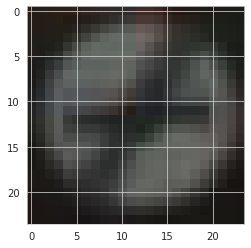

In [13]:
# 4 pixel border crop

from PIL import Image
import numpy as np

image = Image.open('data/imgs/15.jpg')
image_arr = np.array(image)
#print(image_arr.shape)
image_arr = image_arr[4:28, 4:28]
#print(image_arr.shape)
image = Image.fromarray(image_arr)
plt.imshow(image)
plt.show()

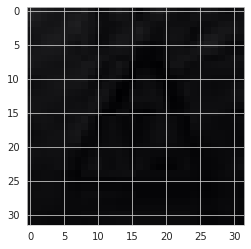

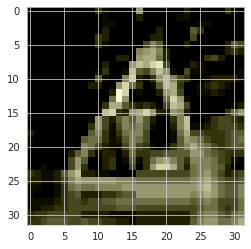

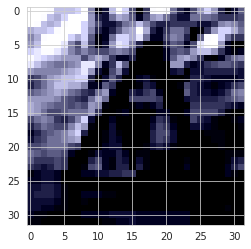

In [14]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("data/imgs/34497.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()


factor = -20.001 #decrease constrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

factor = 20 #increase contrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

Some of these images are not useful.<br>
May want to reduce training set to most clear images only.<br>
Blackened or blurred images may not be helpful.<br>
<br>
Preprocess to black and white might resolve this.

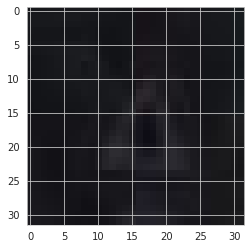

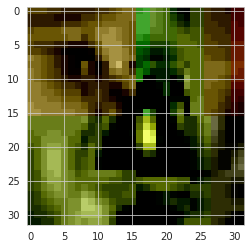

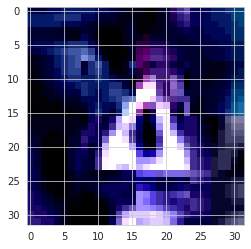

In [15]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("data/imgs/9720.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()


factor = -20.001 #decrease constrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

factor = 20 #increase contrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

Mis-labeled data is going to be worst enemy.<br>
Need to output images with labels.<br>
Need to get indexes of mislabeled images and relabel or drop.

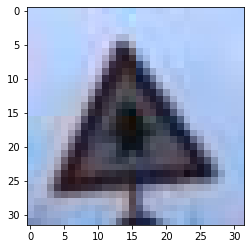

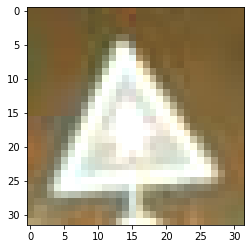

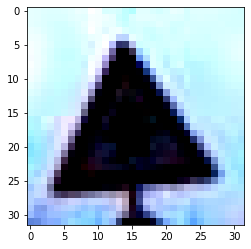

In [13]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("data/imgs/9717.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()


factor = -1.001 #decrease constrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

factor = 2 #increase contrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)
plt.show()

0.8657283268654913
1.0634052253378714


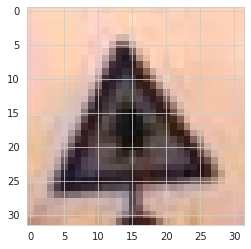

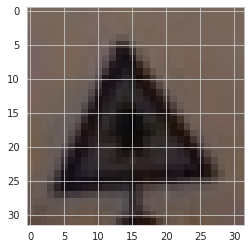

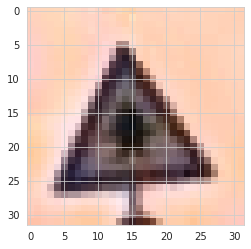

In [16]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
# read image
img = cv2.imread('data/imgs/9717.jpg')

# METHOD 1: RGB

# convert img to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute gamma = log(mid*255)/log(mean)
mid = 0.3
mean = np.mean(gray)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction
img_gamma1 = np.power(img, gamma).clip(0,255).astype(np.uint8);

# METHOD 2: HSV (or other color spaces)

# convert img to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv)

# compute gamma = log(mid*255)/log(mean)
mid = 1
mean = np.mean(val)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)


# do gamma correction on value channel
val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

# combine new value channel with original hue and sat channels
hsv_gamma = cv2.merge([hue, sat, val_gamma])
img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2BGR)

# show results
plt.imshow(img)
plt.show()
plt.imshow(img_gamma1)
plt.show()
plt.imshow(img_gamma2)
plt.show()

How do we detect if image need correction?<br>
Can we correct every image?<br>
Can we detect just shape of sign?

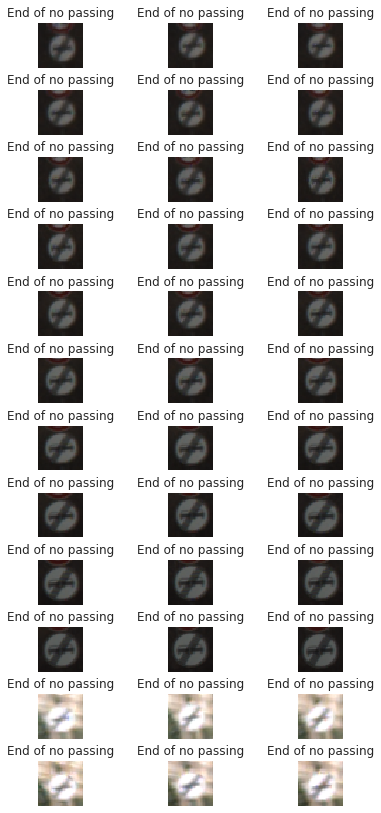

In [17]:
n_rows = 12
n_cols = 3
plt.figure(figsize=(n_cols * 2.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(signimages['features'][index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(signnames[signimages['labels'][index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#plt.savefig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [18]:
signnames[signimages['labels'][32]]

'End of no passing'

In [280]:
import pickle
train = pickle.load( open( "dataroot/train.p", "rb" ) )
valid = pickle.load( open( "dataroot/valid.p", "rb" ) )
test = pickle.load( open( "dataroot/test.p", "rb" ) )

In [281]:
X_train_full = train['features']
y_train_full = train['labels']
X_test_full = test['features']
y_test_full = test['labels']

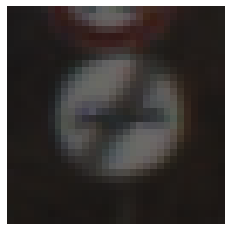

In [282]:
plt.imshow(X_train_full[2], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

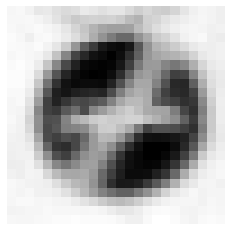

In [283]:
plt.imshow(Z_train[2], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

In [22]:
X_train_full[2].shape

(32, 32, 3)

In [23]:
X_train_full.shape

(34799, 32, 32, 3)

In [24]:
#Z_train = np.zeros(shape=(34799,24,24,3))
#Z_train[0]

In [25]:
X_train_full[1].shape

(32, 32, 3)

In [26]:
#rgb_weights = [0.2989, 0.5870, 0.1140]
#grayscale_image = np.dot(an_image[...,:3], rgb_weights)
#pyplot.imshow(grayscale_image, cmap=pyplot.get_cmap("gray"))

In [222]:
# crop images - convert to grayscale and remove border pixels

from PIL import Image
import numpy as np
from numpy import asarray

rgb_weights = [0.2989, 0.5870, 0.1140]
Z_train = np.zeros(shape=(34799,24,24))
#Z = []

for i in range(0,len(X_train_full)): # 
    image_arr = X_train_full[i][4:28, 4:28]
    grayscale_image = np.dot(image_arr, rgb_weights)
    image = Image.fromarray(grayscale_image)
    #print(type(image))
    #print(image.shape)
    Z_train[i] = image
    #plt.imshow(Z_train[i], cmap="binary", interpolation="nearest")
    #plt.show()
    


In [223]:
# crop images - convert to grayscale and remove border pixels

from PIL import Image
import numpy as np
from numpy import asarray

rgb_weights = [0.2989, 0.5870, 0.1140]
Z_test = np.zeros(shape=(len(X_test_full),24,24))

for i in range(0,len(X_test_full)): # 
    image_arr = X_test_full[i][4:28, 4:28]
    grayscale_image = np.dot(image_arr, rgb_weights)
    image = Image.fromarray(grayscale_image)
    #print(type(image))
    #print(image.shape)
    Z_test[i] = image
    #plt.imshow(Z_train[i], cmap="binary", interpolation="nearest")
    #plt.show()
    


In [29]:
#plt.imshow(Z_train[3], cmap="binary", interpolation="nearest")
#plt.show()

In [30]:
Z_train.shape

(34799, 24, 24)

In [31]:
Z_train[4444]

array([[ 42.72460175,  41.81090164,  57.75999832,  58.85860062,
         55.36429977,  48.5821991 ,  44.69660187,  41.88180161,
         42.99570084,  45.40840149,  42.62590027,  44.23429871,
         46.55459976,  47.75019836,  46.66859818,  42.59809875,
         45.59780121,  59.77050018,  64.98889923,  49.80099869,
         50.86560059,  54.00090027,  51.91939926,  49.95809937],
       [ 41.73550034,  37.69729996,  46.75030136,  45.06639862,
         43.87080002,  46.09859848,  46.39749908,  42.99570084,
         45.10950089,  47.93510056,  45.26660156,  44.40219879,
         42.41320038,  43.89690018,  43.59799957,  42.34230042,
         47.34180069,  60.11249924,  69.70030212,  66.85939789,
         73.76629639,  65.99520111,  50.06140137,  47.08940125],
       [ 41.77859879,  38.99610138,  42.81079865,  40.46900177,
         34.50189972,  41.44110107,  48.15230179,  46.26649857,
         46.08160019,  43.49480057,  40.65219879,  40.68450165,
         38.21170044,  38.09769821,  3

In [32]:
Z_train[4].shape

(24, 24)

In [225]:
X_valid, X_train = Z_train[:3000] / 255., Z_train[3000:] / 255.
y_valid, y_train = y_train_full[:3000], y_train_full[3000:]
X_test = Z_test / 255.
y_test = y_test_full, y_test_full

# I don't know how random this split method is

In [226]:
len(X_train)

31799

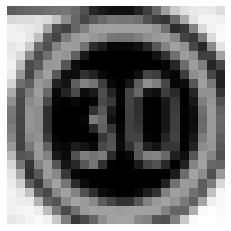

In [227]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

In [36]:
X_train.shape

(31799, 24, 24)

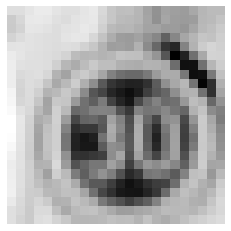

In [37]:
plt.imshow(X_train[100], cmap="binary")
plt.axis('off')
plt.show()

In [38]:
len(signnames)

43

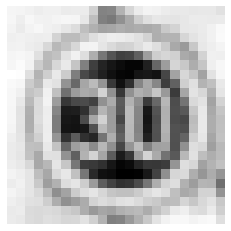

In [39]:
plt.imshow(X_train[1000], cmap="binary")
plt.axis('off')
plt.show()

In [46]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[24, 24]))
model.add(keras.layers.Dense(576, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))

In [49]:
tf.__version__

'2.4.1'

In [50]:
keras.__version__

'2.4.0'

In [51]:
X_valid.shape

(3000, 24, 24)

In [52]:
model.layers

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 576)               332352    
_________________________________________________________________
dense_3 (Dense)              (None, 43)                24811     
Total params: 357,163
Trainable params: 357,163
Non-trainable params: 0
_________________________________________________________________


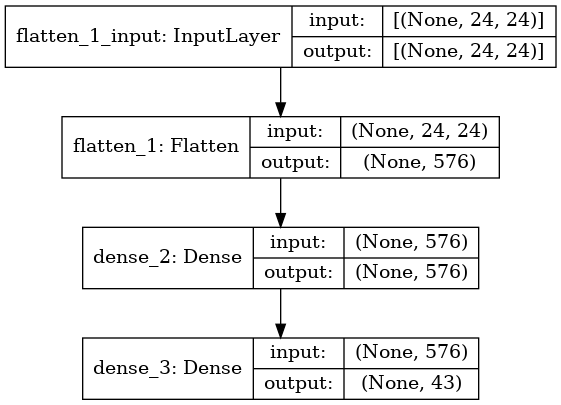

In [54]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [55]:
hidden1 = model.layers[1]
hidden1.name

'dense_2'

In [56]:
model.get_layer(hidden1.name) is hidden1

True

In [57]:
weights, biases = hidden1.get_weights()

In [58]:
weights

array([[ 0.03483845,  0.01855405, -0.06965952, ...,  0.05719241,
        -0.06172751,  0.00386624],
       [-0.04721016, -0.05220962, -0.00126065, ...,  0.04662729,
        -0.05283153,  0.04861831],
       [ 0.03429189, -0.05746827,  0.05452833, ...,  0.00818681,
         0.05725732, -0.02648533],
       ...,
       [-0.03280009,  0.03195766,  0.05760099, ..., -0.06527302,
         0.02755421, -0.06127886],
       [ 0.06040299, -0.04467531, -0.02964652, ..., -0.0400075 ,
        -0.0435598 , -0.05914297],
       [-0.05705465,  0.02138627,  0.00652479, ..., -0.00702048,
         0.02275363,  0.01649325]], dtype=float32)

In [59]:
weights.shape

(576, 576)

In [60]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
'''from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'nadam', 'sgd']))
METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

def train_test_model(hparams):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
        tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
        tf.keras.layers.Dense(43, activation=tf.nn.softmax),
      ])
    model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
    )

    model.fit(X_train, y_train, epochs=10) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(X_test, y_test)
    
    return accuracy'''

"from tensorboard.plugins.hparams import api as hp\n\nHP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))\nHP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))\nHP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'nadam', 'sgd']))\nMETRIC_ACCURACY = 'accuracy'\n\nwith tf.summary.create_file_writer('logs/hparam_tuning').as_default():\n    hp.hparams_config(\n        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],\n        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],\n    )\n\ndef train_test_model(hparams):\n    model = tf.keras.models.Sequential([\n        tf.keras.layers.Flatten(),\n        tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),\n        tf.keras.layers.Dropout(hparams[HP_DROPOUT]),\n        tf.keras.layers.Dense(43, activation=tf.nn.softmax),\n      ])\n    model.compile(\n      optimizer=hparams[HP_OPTIMIZER],\n      loss='sparse_categorical_crossentropy',\n      metrics=['accuracy'],\n    )\n\n    model.fit(X_

In [62]:
'''def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)'''

'def run(run_dir, hparams):\n    with tf.summary.create_file_writer(run_dir).as_default():\n        hp.hparams(hparams)  # record the values used in this trial\n        accuracy = train_test_model(hparams)\n        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)'

In [63]:
'''%%bash
wget --no-check-certificate https://storage.googleapis.com/download.tensorflow.org/tensorboard/hparams_demo_logs.zip 
unzip -q hparams_demo_logs.zip -d logs/hparam_demo'''

'%%bash\nwget --no-check-certificate https://storage.googleapis.com/download.tensorflow.org/tensorboard/hparams_demo_logs.zip \nunzip -q hparams_demo_logs.zip -d logs/hparam_demo'

In [64]:
'''%load_ext tensorboard'''

'%load_ext tensorboard'

In [65]:
#%%bash
#tensorboard --logdir /logs/hparam_demo

In [66]:
'''model.fit(
    X_train, y_train, epochs=10,
    callbacks=[
        tf.keras.callbacks.TensorBoard(logdir),  # log metrics
        hp.KerasCallback(logdir, hparams),  # log hparams
    ],
)'''

'model.fit(\n    X_train, y_train, epochs=10,\n    callbacks=[\n        tf.keras.callbacks.TensorBoard(logdir),  # log metrics\n        hp.KerasCallback(logdir, hparams),  # log hparams\n    ],\n)'

In [67]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
# sparse_categorical_crossentropy
# 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'

In [68]:
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
994/994 [==============================] - 6s 5ms/step - loss: 2.1996 - accuracy: 0.4552 - val_loss: 19.0887 - val_accuracy: 0.0907
Epoch 2/30
994/994 [==============================] - 3s 3ms/step - loss: 0.7446 - accuracy: 0.8231 - val_loss: 22.1254 - val_accuracy: 0.1303
Epoch 3/30
994/994 [==============================] - 3s 3ms/step - loss: 0.4960 - accuracy: 0.8861 - val_loss: 24.2475 - val_accuracy: 0.1780
Epoch 4/30
994/994 [==============================] - 3s 3ms/step - loss: 0.3929 - accuracy: 0.9140 - val_loss: 26.4227 - val_accuracy: 0.2170
Epoch 5/30
994/994 [==============================] - 3s 3ms/step - loss: 0.3352 - accuracy: 0.9224 - val_loss: 26.2370 - val_accuracy: 0.2090
Epoch 6/30
994/994 [==============================] - 3s 3ms/step - loss: 0.2829 - accuracy: 0.9360 - val_loss: 27.9093 - val_accuracy: 0.2067
Epoch 7/30
994/994 [==============================] - 3s 3ms/step - loss: 0.2541 - accuracy: 0.9404 - val_loss: 27.6682 - val_accuracy: 0.1840

In [69]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 994}

In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [71]:
import seaborn as sns
sns.set_style('whitegrid')

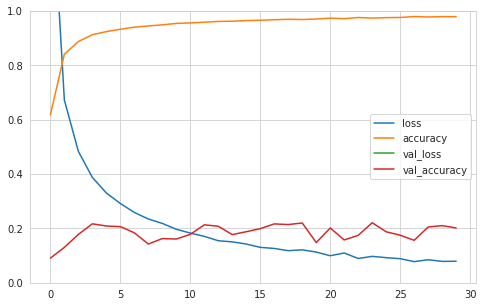

In [75]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig("keras_learning_curves_plot")
plt.show()

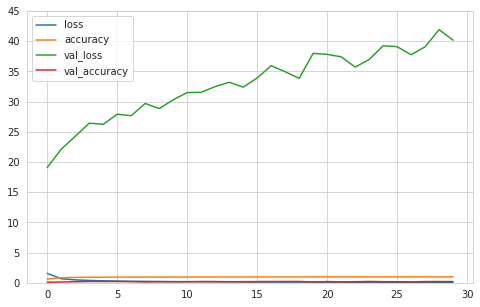

In [80]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 45)
#plt.savefig("keras_learning_curves_plot")
plt.show()

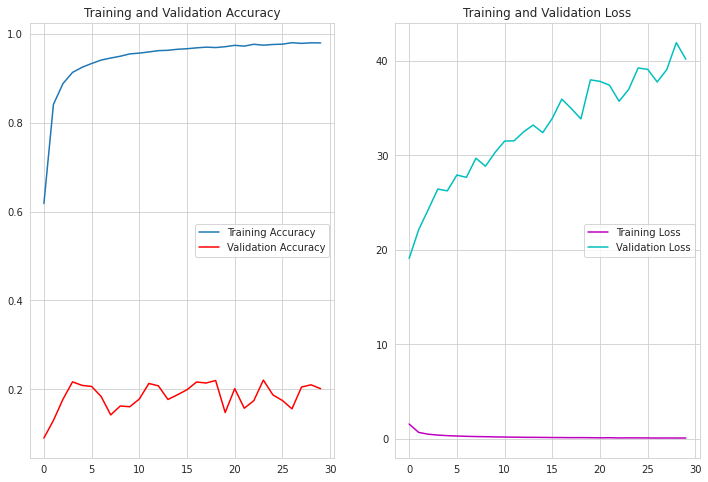

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='r')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='m')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='c')
plt.legend(loc='center right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 1s 2ms/step - loss: 4.1243 - accuracy: 0.8241


[4.124274730682373, 0.8241488337516785]

In [84]:
X_new = X_test[:21]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0. 

In [85]:
y_pred = model.predict_classes(X_new)
y_pred

/mnt/c/envs/env_unix/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 19,  8,  4,  9, 21,
       20, 27, 38,  4])

In [86]:
class_names = list(signnames.values())
class_names

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [87]:
first_3 = np.array(class_names)[y_pred]
first_3

array(['Vehicles over 3.5 metric tons prohibited', 'Speed limit (30km/h)',
       'Keep right', 'Turn right ahead',
       'Right-of-way at the next intersection', 'Keep right',
       'General caution', 'Priority road', 'Road work', 'Ahead only',
       'Priority road', 'Speed limit (100km/h)',
       'Dangerous curve to the left', 'Speed limit (120km/h)',
       'Speed limit (70km/h)', 'No passing', 'Double curve',
       'Dangerous curve to the right', 'Pedestrians', 'Keep right',
       'Speed limit (70km/h)'], dtype='<U50')

In [88]:
y_pred

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 19,  8,  4,  9, 21,
       20, 27, 38,  4])

In [89]:
print(signnames.values())

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric to

PREDICTION: Vehicles over 3.5 metric tons prohibited


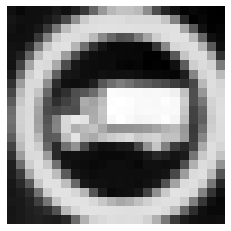

PREDICTION: Speed limit (30km/h)


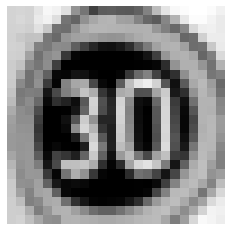

PREDICTION: Keep right


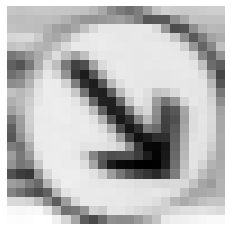

PREDICTION: Turn right ahead


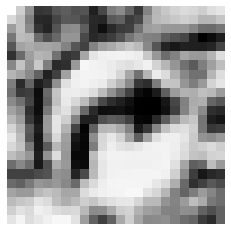

PREDICTION: Right-of-way at the next intersection


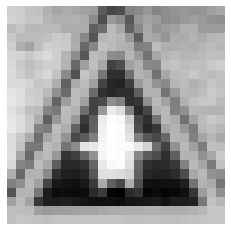

PREDICTION: Keep right


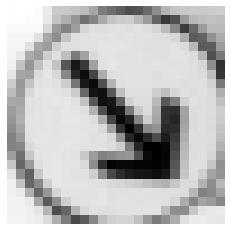

PREDICTION: General caution


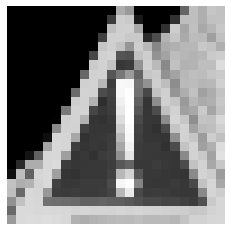

PREDICTION: Priority road


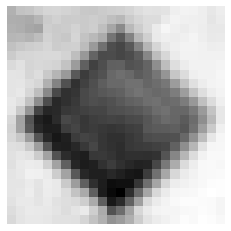

PREDICTION: Road work


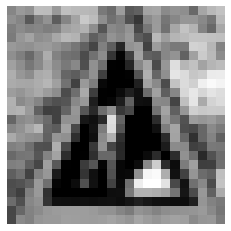

In [90]:
for i in range(0,9):
    print('PREDICTION:',first_3[i])
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    #plt.title('PREDICTION:',first_3[i])
    plt.show()

PREDICTIONS


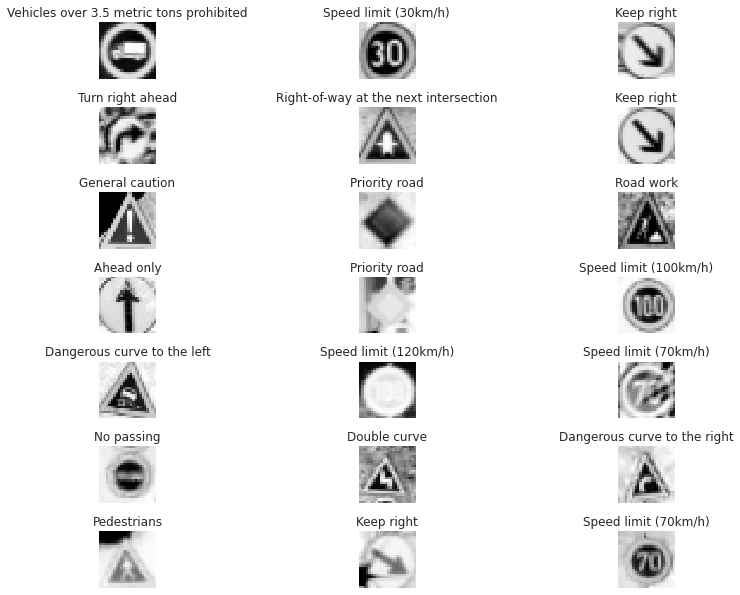

In [91]:
print('PREDICTIONS')
plt.figure(figsize=(12.2, 10.4))
for index, image in enumerate(X_new):
    plt.subplot(7, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.6, hspace=.5);
#plt.savefig('fashion_mnist_images_plot');
plt.show();

PREDICTION: Priority road


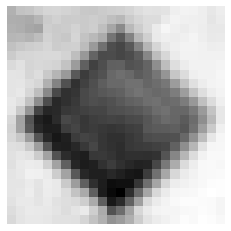

PREDICTION: Priority road


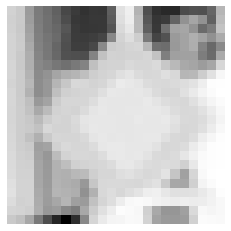

PREDICTION: Speed limit (120km/h)


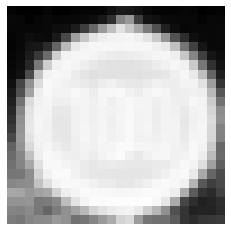

In [95]:
for i in [7,10,13]:
    print('PREDICTION:',first_3[i])
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    #plt.title('PREDICTION:',first_3[i])
    plt.show()

# optimizer options
binary_crossentropy v sparce_categorical_crossentropy<br>
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']<br>

In [481]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [482]:
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0759 - accuracy: 0.9796 - val_loss: 44.3411 - val_accuracy: 0.1080
Epoch 2/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0568 - accuracy: 0.9844 - val_loss: 46.2082 - val_accuracy: 0.1327
Epoch 3/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0682 - accuracy: 0.9819 - val_loss: 44.9496 - val_accuracy: 0.2063
Epoch 4/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0574 - accuracy: 0.9845 - val_loss: 45.6582 - val_accuracy: 0.2073
Epoch 5/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0558 - accuracy: 0.9845 - val_loss: 48.4963 - val_accuracy: 0.1840
Epoch 6/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0589 - accuracy: 0.9838 - val_loss: 46.7019 - val_accuracy: 0.2047
Epoch 7/30
994/994 [==============================] - 3s 3ms/step - loss: 0.0555 - accuracy: 0.9846 - val_loss: 46.9881 - val_accuracy: 0.1957

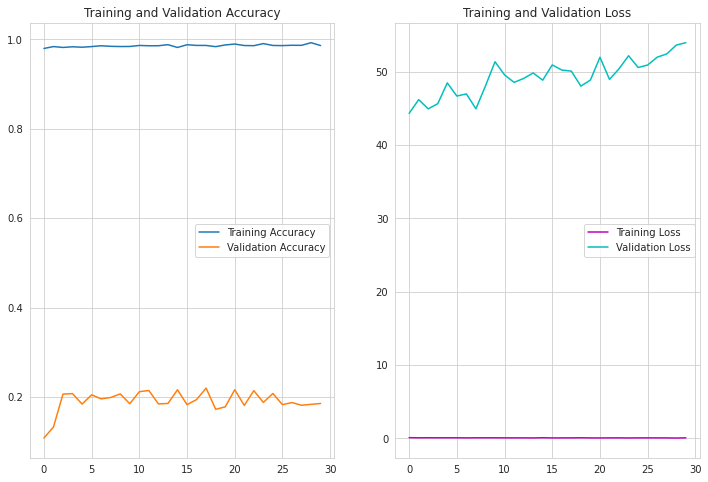

In [483]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='m')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='c')
plt.legend(loc='center right')
plt.title('Training and Validation Loss')
plt.show()

## CNN - Convolutional Neural Net

In [121]:
import pickle
train = pickle.load( open( "dataroot/train.p", "rb" ) )
valid = pickle.load( open( "dataroot/valid.p", "rb" ) )
test = pickle.load( open( "dataroot/test.p", "rb" ) )

X_train = train['features']
y_train = train['labels']
X_test = test['features']
y_test = test['labels']

https://www.tensorflow.org/tutorials/images/cnn

In [124]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [125]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.add(layers.Flatten())
model.add(layers.Dense(576, activation='relu'))
model.add(layers.Dense(43))

In [145]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/8
1088/1088 [==============================] - 14s 11ms/step - loss: 19.7494 - accuracy: 0.6895 - val_loss: 1.1791 - val_accuracy: 0.8417
Epoch 2/8
1088/1088 [==============================] - 12s 11ms/step - loss: 0.3841 - accuracy: 0.9145 - val_loss: 1.5729 - val_accuracy: 0.8551
Epoch 3/8
1088/1088 [==============================] - 12s 11ms/step - loss: 0.6406 - accuracy: 0.8921 - val_loss: 3.0035 - val_accuracy: 0.8481
Epoch 4/8
1088/1088 [==============================] - 12s 11ms/step - loss: 1.0177 - accuracy: 0.8313 - val_loss: 2.3044 - val_accuracy: 0.6470
Epoch 5/8
1088/1088 [==============================] - 12s 11ms/step - loss: 1.4439 - accuracy: 0.7328 - val_loss: 1.7112 - val_accuracy: 0.7709
Epoch 6/8
1088/1088 [==============================] - 12s 11ms/step - loss: 1.0781 - accuracy: 0.7897 - val_loss: 1.5541 - val_accuracy: 0.7389
Epoch 7/8
1088/1088 [==============================] - 12s 11ms/step - loss: 1.0972 - accuracy: 0.7806 - val_loss: 1.9810 - val_a

395/395 - 1s - loss: 1.9506 - accuracy: 0.7781


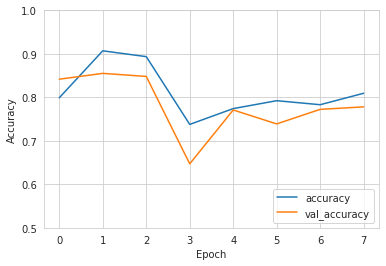

In [187]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [149]:
print('Test Accuracy: ',test_acc)

Test Accuracy:  0.7780680656433105


In [184]:
y_pred = model.predict_classes(X_test)

In [185]:
y_pred 

array([16,  1, 38, ..., 18,  7, 10])

PREDICTIONS


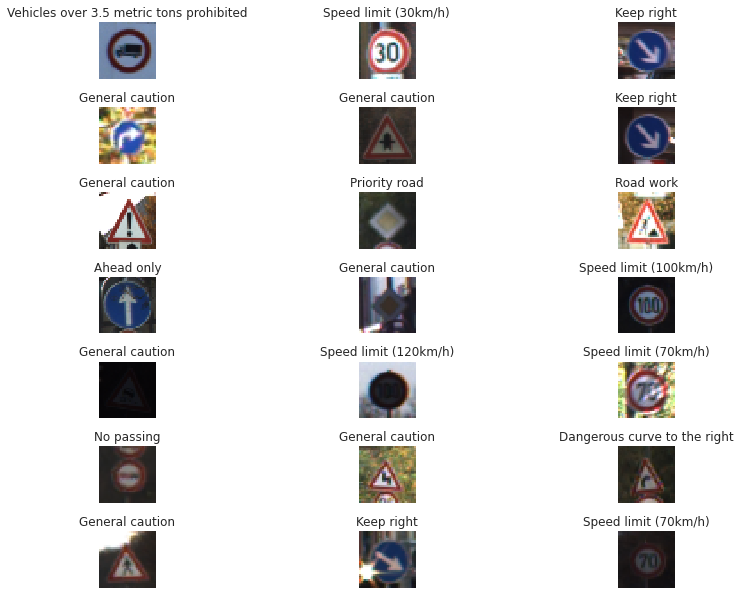

In [186]:
print('PREDICTIONS')
plt.figure(figsize=(12.2, 10.4))
for index, image in enumerate(X_new):
    plt.subplot(7, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.6, hspace=.5);
#plt.savefig('fashion_mnist_images_plot');
plt.show();

## CNN improved with RMSprop

In [272]:
import pickle
train = pickle.load( open( "dataroot/train.p", "rb" ) )
valid = pickle.load( open( "dataroot/valid.p", "rb" ) )
test = pickle.load( open( "dataroot/test.p", "rb" ) )

X_train = train['features']
y_train = train['labels']
X_test = test['features']
y_test = test['labels']

In [273]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [274]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [275]:
model.add(layers.Flatten())
model.add(layers.Dense(576, activation='relu'))
model.add(layers.Dense(43))

In [276]:
#['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1088/1088 [==============================] - 12s 11ms/step - loss: 2.1050 - accuracy: 0.6398 - val_loss: 1.5092 - val_accuracy: 0.8124
Epoch 2/10
1088/1088 [==============================] - 11s 11ms/step - loss: 0.2115 - accuracy: 0.9550 - val_loss: 0.9059 - val_accuracy: 0.9196
Epoch 3/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.1776 - accuracy: 0.9702 - val_loss: 1.0240 - val_accuracy: 0.8925
Epoch 4/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1467 - accuracy: 0.9769 - val_loss: 2.1312 - val_accuracy: 0.9011
Epoch 5/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1460 - accuracy: 0.9816 - val_loss: 2.2469 - val_accuracy: 0.9105
Epoch 6/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1393 - accuracy: 0.9832 - val_loss: 3.6881 - val_accuracy: 0.9279
Epoch 7/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.1512 - accuracy: 0.9844 - val_loss: 2.5319 -

395/395 - 1s - loss: 2.6750 - accuracy: 0.9227


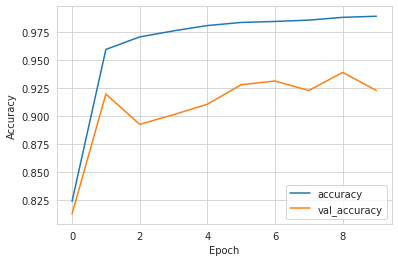

In [277]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

395/395 - 1s - loss: 2.6750 - accuracy: 0.9227


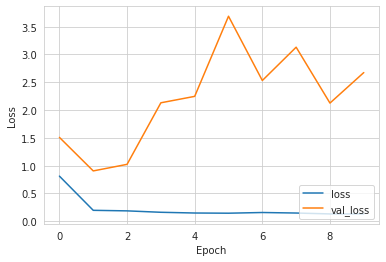

In [279]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [206]:
y_pred = model.predict_classes(X_test)

PREDICTIONS


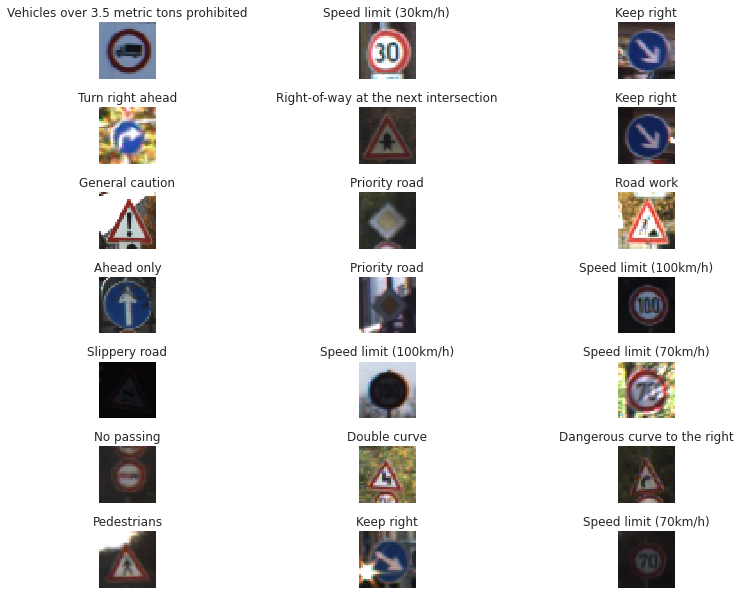

In [207]:
print('PREDICTIONS')
plt.figure(figsize=(12.2, 10.4))
for index, image in enumerate(X_new):
    plt.subplot(7, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.6, hspace=.5);
#plt.savefig('fashion_mnist_images_plot');
plt.show();

PREDICTION: Slippery road


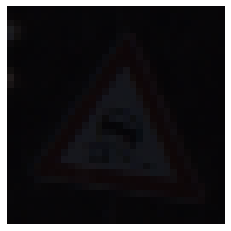

In [219]:
for i in [12]:
    print('PREDICTION:',signnames[y_test[i]])
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    #plt.title('PREDICTION:',first_3[i])
    plt.show()

In [216]:
y_true_labels = np.array(class_names)[y_test[:21]]

for i in range(0,len(y_true_labels)):
    print(i+1, y_true_labels[i])

1 Vehicles over 3.5 metric tons prohibited
2 Speed limit (30km/h)
3 Keep right
4 Turn right ahead
5 Right-of-way at the next intersection
6 Keep right
7 General caution
8 Priority road
9 Road work
10 Ahead only
11 Priority road
12 Speed limit (100km/h)
13 Slippery road
14 Speed limit (100km/h)
15 Speed limit (70km/h)
16 No passing
17 Double curve
18 Dangerous curve to the right
19 Pedestrians
20 Keep right
21 Speed limit (70km/h)


## KNN attempt

In [257]:
import pickle
train = pickle.load( open( "dataroot/train.p", "rb" ) )
valid = pickle.load( open( "dataroot/valid.p", "rb" ) )
test = pickle.load( open( "dataroot/test.p", "rb" ) )


X_train_full = train['features']
y_train_full = train['labels']
X_test_full = test['features']
y_test_full = test['labels']



from PIL import Image
import numpy as np
from numpy import asarray

rgb_weights = [0.2989, 0.5870, 0.1140]
Z_train = np.zeros(shape=(34799,24,24))
#Z = []

for i in range(0,len(X_train_full)): # 
    image_arr = X_train_full[i][4:28, 4:28]
    grayscale_image = np.dot(image_arr, rgb_weights)
    image = Image.fromarray(grayscale_image)
    #print(type(image))
    #print(image.shape)
    Z_train[i] = image
    #plt.imshow(Z_train[i], cmap="binary", interpolation="nearest")
    #plt.show()



# crop images - convert to grayscale and remove border pixels

from PIL import Image
import numpy as np
from numpy import asarray

rgb_weights = [0.2989, 0.5870, 0.1140]
Z_test = np.zeros(shape=(len(X_test_full),24,24))

for i in range(0,len(X_test_full)): # 
    image_arr = X_test_full[i][4:28, 4:28]
    grayscale_image = np.dot(image_arr, rgb_weights)
    image = Image.fromarray(grayscale_image)
    #print(type(image))
    #print(image.shape)
    Z_test[i] = image
    #plt.imshow(Z_train[i], cmap="binary", interpolation="nearest")
    #plt.show()
    

X_valid, X_train = Z_train[:3000] / 255., Z_train[3000:] / 255.
y_valid, y_train = y_train_full[:3000], y_train_full[3000:]
X_test = Z_test / 255.
y_test = y_test_full, y_test_full

In [258]:
df_list = []

for i in range(0,len(X_train)):
    df_list.append(X_train[i].flatten())

df = pd.DataFrame(df_list)

In [259]:
X_train = df
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.953162,0.938075,0.909455,0.866213,0.822971,0.783245,0.757585,0.757266,0.796200,0.841955,...,0.540802,0.613769,0.681685,0.633735,0.374568,0.178653,0.086846,0.082327,0.116530,0.121624
1,0.697740,0.699638,0.699342,0.685065,0.616424,0.544477,0.537765,0.618938,0.742916,0.882864,...,0.483157,0.549073,0.708438,0.605362,0.407785,0.187800,0.070841,0.086460,0.121666,0.154359
2,0.664002,0.645357,0.627159,0.613329,0.598412,0.586733,0.574354,0.612740,0.708896,0.861839,...,0.502353,0.531903,0.691315,0.705585,0.536575,0.271764,0.095178,0.074333,0.075101,0.092236


In [260]:
df_list = []

for i in range(0,len(X_test)):
    df_list.append(X_test[i].flatten())

X_test = pd.DataFrame(df_list)
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.527955,0.540275,0.529683,0.530130,0.527828,0.510802,0.529212,0.500912,0.449405,0.361309,...,0.131744,0.153374,0.217901,0.329313,0.448736,0.505244,0.524143,0.530535,0.532837,0.528469
1,0.303556,0.298456,0.306299,0.247675,0.189178,0.204796,0.266422,0.512798,0.612811,0.780182,...,0.402078,0.392617,0.383965,0.451391,0.588632,0.481436,0.291491,0.182060,0.199449,0.220269
2,0.251959,0.257499,0.254025,0.248932,0.248763,0.254581,0.254539,0.255264,0.265173,0.288144,...,0.360009,0.309143,0.258471,0.168713,0.154309,0.149705,0.140969,0.134661,0.127266,0.128438


In [234]:
len(y_train)

31799

In [266]:
len(y_test[0])

12630

In [261]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [262]:
y_pred = neigh.predict(X_test)

In [120]:
y_pred

array([16,  4, 38, ...,  3, 16, 10], dtype=uint8)

In [267]:
from sklearn.metrics import mean_squared_error
y_true = y_test[0]
y_pred = y_pred

In [268]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))

0.4773555027711797


In [269]:
print('y_pred:',len(y_pred),' y_test:',len(y_test[0]))

y_pred: 12630  y_test: 12630


In [270]:
mse = mean_squared_error(y_true, y_pred)
print('MSE - KNN:',mse)

MSE - KNN: 27.509263657957245


In [271]:
knn_df = pd.DataFrame(y_true, columns=['y_true'])
knn_df['y_pred'] = y_pred
knn_df.head(21)

,y_true,y_pred
0,16,16
1,1,4
2,38,38
3,33,22
4,11,11
5,38,38
6,18,18
7,12,12
8,25,25
9,35,35


In [ ]:
# Tensorflow Grid Search scratch code

'''# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(576, input_dim=24, activation='relu'))
	model.add(Dense(43, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''